In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra


In [2]:
data=pd.read_csv("Dataset\Sleep_health_and_lifestyle_dataset.csv")

In [3]:
data.sample(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
199,200,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
255,256,Female,45,Teacher,6.5,7,45,4,Overweight,135/90,65,6000,Insomnia
238,239,Male,44,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000,Insomnia
85,86,Female,35,Accountant,7.2,8,60,4,Normal,115/75,68,7000,None
72,73,Male,33,Doctor,6.1,6,30,8,Normal,125/80,72,5000,None
365,366,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
114,115,Female,37,Accountant,7.2,8,60,4,Normal,115/75,68,7000,None
158,159,Male,39,Lawyer,7.2,8,60,5,Normal,130/85,68,8000,None
352,353,Female,58,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
279,280,Female,50,Engineer,8.3,9,30,3,Normal,125/80,65,5000,None


## EDA

In [4]:
# Check the data types of each column
data.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [5]:
# Get some descriptive statistics of the numerical columns
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
# Check for missing values
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

array([[<AxesSubplot: title={'center': 'Person ID'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Sleep Duration'}>],
       [<AxesSubplot: title={'center': 'Quality of Sleep'}>,
        <AxesSubplot: title={'center': 'Physical Activity Level'}>,
        <AxesSubplot: title={'center': 'Stress Level'}>],
       [<AxesSubplot: title={'center': 'Heart Rate'}>,
        <AxesSubplot: title={'center': 'Daily Steps'}>, <AxesSubplot: >]],
      dtype=object)

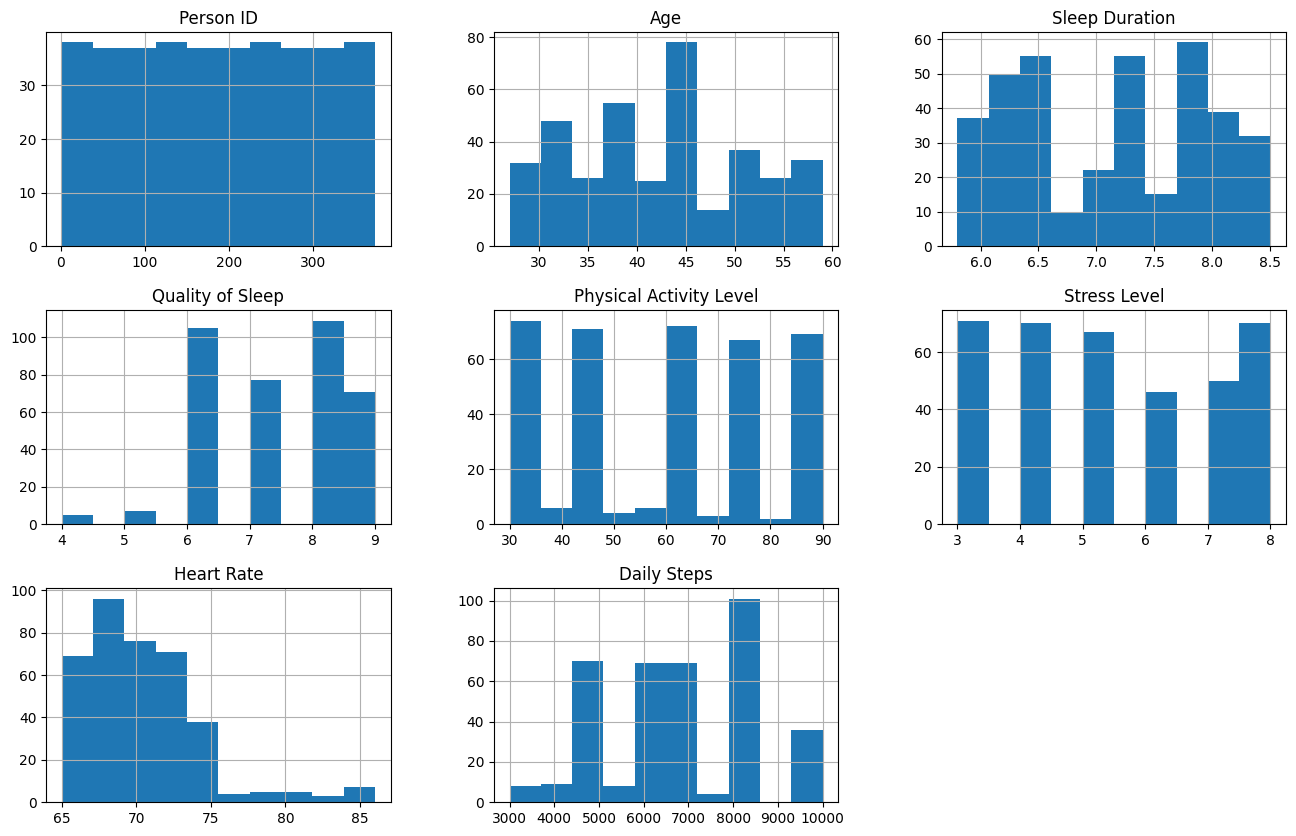

In [7]:
# Visualize the distribution of the numerical columns
data.hist(figsize=(16, 10))

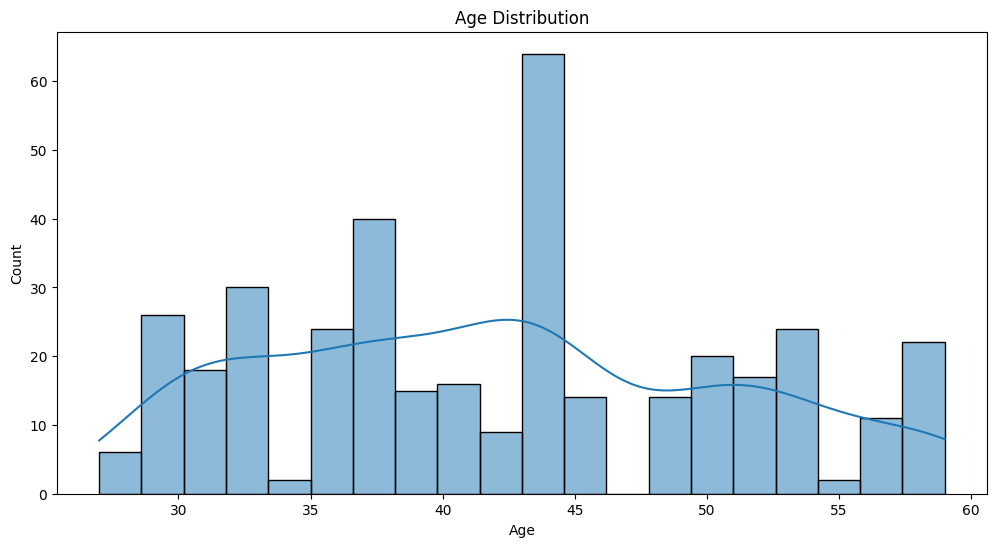

In [8]:
# Data distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

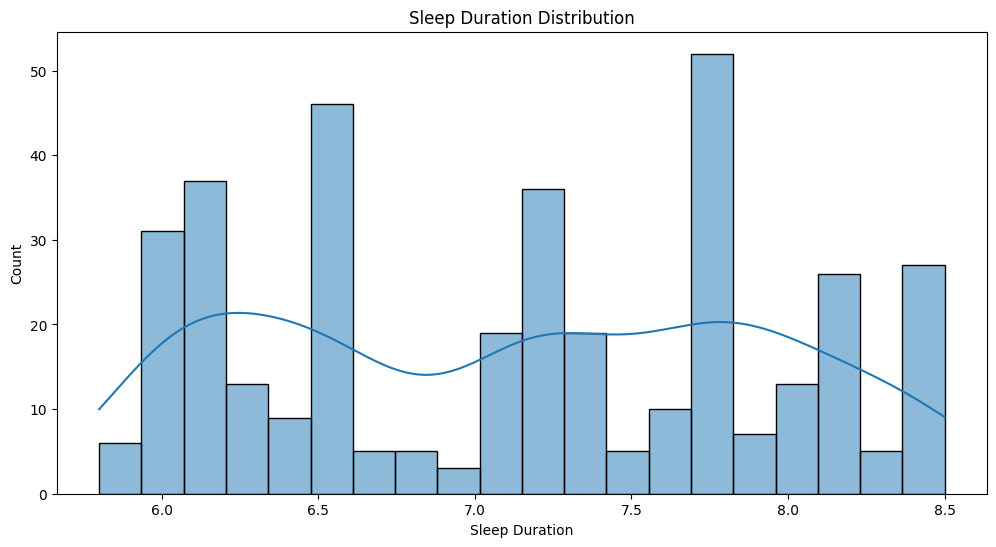

In [9]:
# Data distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Sleep Duration'], bins=20, kde=True)
plt.title("Sleep Duration Distribution")
plt.xlabel("Sleep Duration")
plt.ylabel("Count")
plt.show()

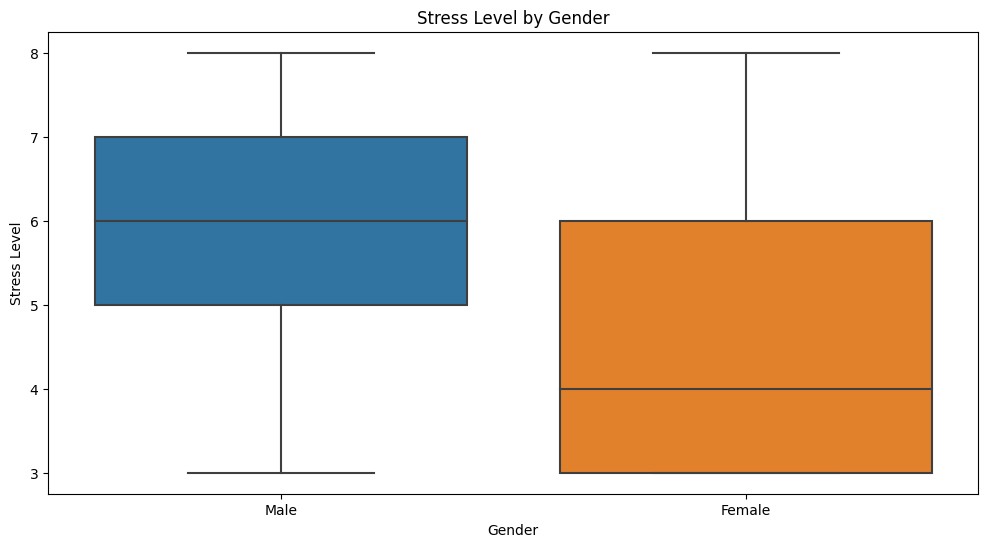

In [10]:
# Box plots for categorical variables
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Stress Level', data=data)
plt.title("Stress Level by Gender")
plt.show()

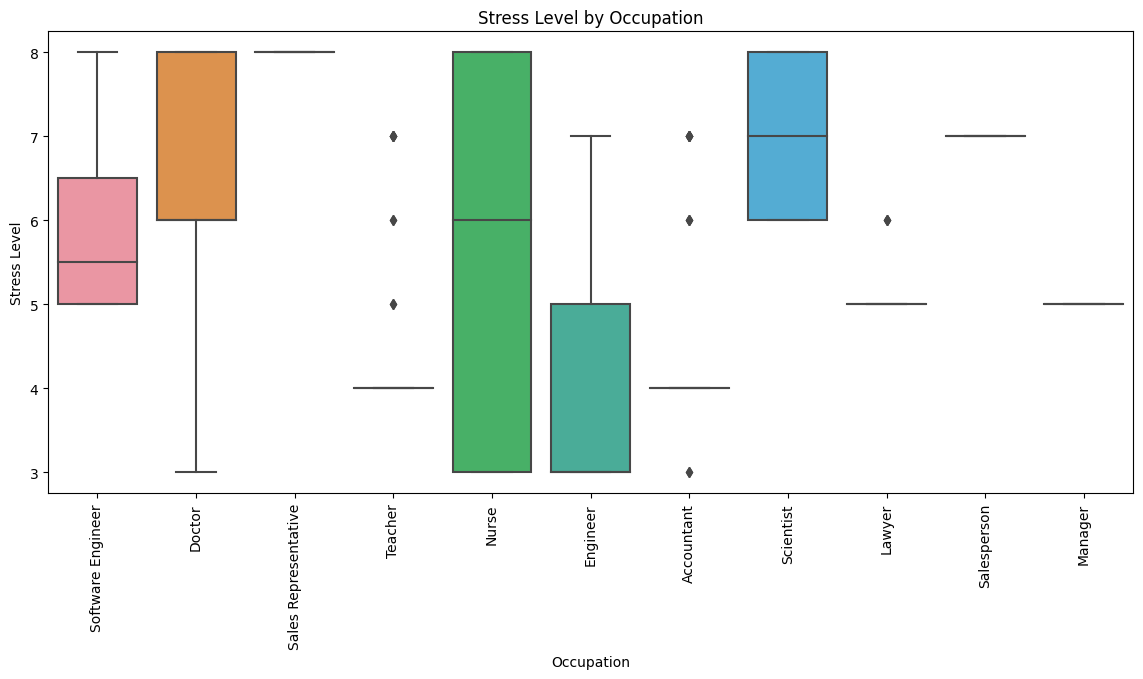

In [11]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Occupation', y='Stress Level', data=data)
plt.title("Stress Level by Occupation")
plt.xticks(rotation=90)
plt.show()

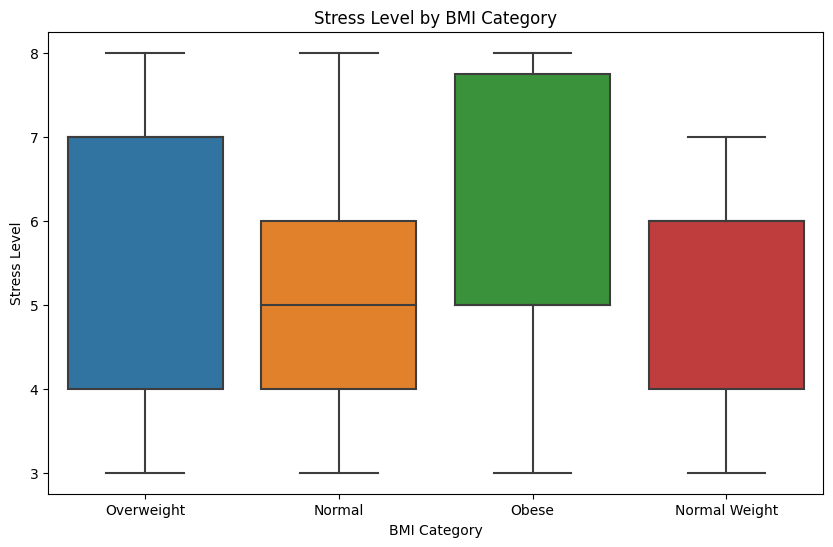

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Stress Level', data=data)
plt.title("Stress Level by BMI Category")
plt.show()


## Data Preprocessing

In [13]:
data=data.drop(["Blood Pressure","Sleep Disorder","Person ID"],axis=1)

In [14]:
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000
...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000


In [15]:
# Specify the categorical columns to be one-hot encoded
categorical_columns = ['Gender', 'Occupation', 'BMI Category']

In [16]:
# Use get_dummies to one-hot encode the categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)
# Print the first few rows of the encoded dataset to check the results
data_encoded

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Female,Gender_Male,Occupation_Accountant,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,27,6.1,6,42,6,77,4200,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,28,6.2,6,60,8,75,10000,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,28,6.2,6,60,8,75,10000,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,28,5.9,4,30,8,85,3000,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,28,5.9,4,30,8,85,3000,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000,1,0,0,...,1,0,0,0,0,0,0,0,0,1
370,59,8.0,9,75,3,68,7000,1,0,0,...,1,0,0,0,0,0,0,0,0,1
371,59,8.1,9,75,3,68,7000,1,0,0,...,1,0,0,0,0,0,0,0,0,1
372,59,8.1,9,75,3,68,7000,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [17]:
# Create a dictionary that maps True to 1 and False to 0
replace_dict = {True: 1, False: 0}

In [18]:
# Replace the True and False values in the DataFrame
data_encoded= data_encoded.replace(replace_dict)
data_encoded

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Female,Gender_Male,Occupation_Accountant,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,27,6.1,6,42,6,77,4200,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,28,6.2,6,60,8,75,10000,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,28,6.2,6,60,8,75,10000,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,28,5.9,4,30,8,85,3000,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,28,5.9,4,30,8,85,3000,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000,1,0,0,...,1,0,0,0,0,0,0,0,0,1
370,59,8.0,9,75,3,68,7000,1,0,0,...,1,0,0,0,0,0,0,0,0,1
371,59,8.1,9,75,3,68,7000,1,0,0,...,1,0,0,0,0,0,0,0,0,1
372,59,8.1,9,75,3,68,7000,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [19]:
data_encoded.corr()['Stress Level']

Age                               -0.422344
Sleep Duration                    -0.811023
Quality of Sleep                  -0.898752
Physical Activity Level           -0.034134
Stress Level                       1.000000
Heart Rate                         0.670026
Daily Steps                        0.186829
Gender_Female                     -0.396018
Gender_Male                        0.396018
Occupation_Accountant             -0.147791
Occupation_Doctor                  0.368038
Occupation_Engineer               -0.379980
Occupation_Lawyer                 -0.068714
Occupation_Manager                -0.011250
Occupation_Nurse                   0.045274
Occupation_Sales Representative    0.108196
Occupation_Salesperson             0.278757
Occupation_Scientist               0.094753
Occupation_Software Engineer       0.036081
Occupation_Teacher                -0.167945
BMI Category_Normal               -0.151259
BMI Category_Normal Weight        -0.026776
BMI Category_Obese              

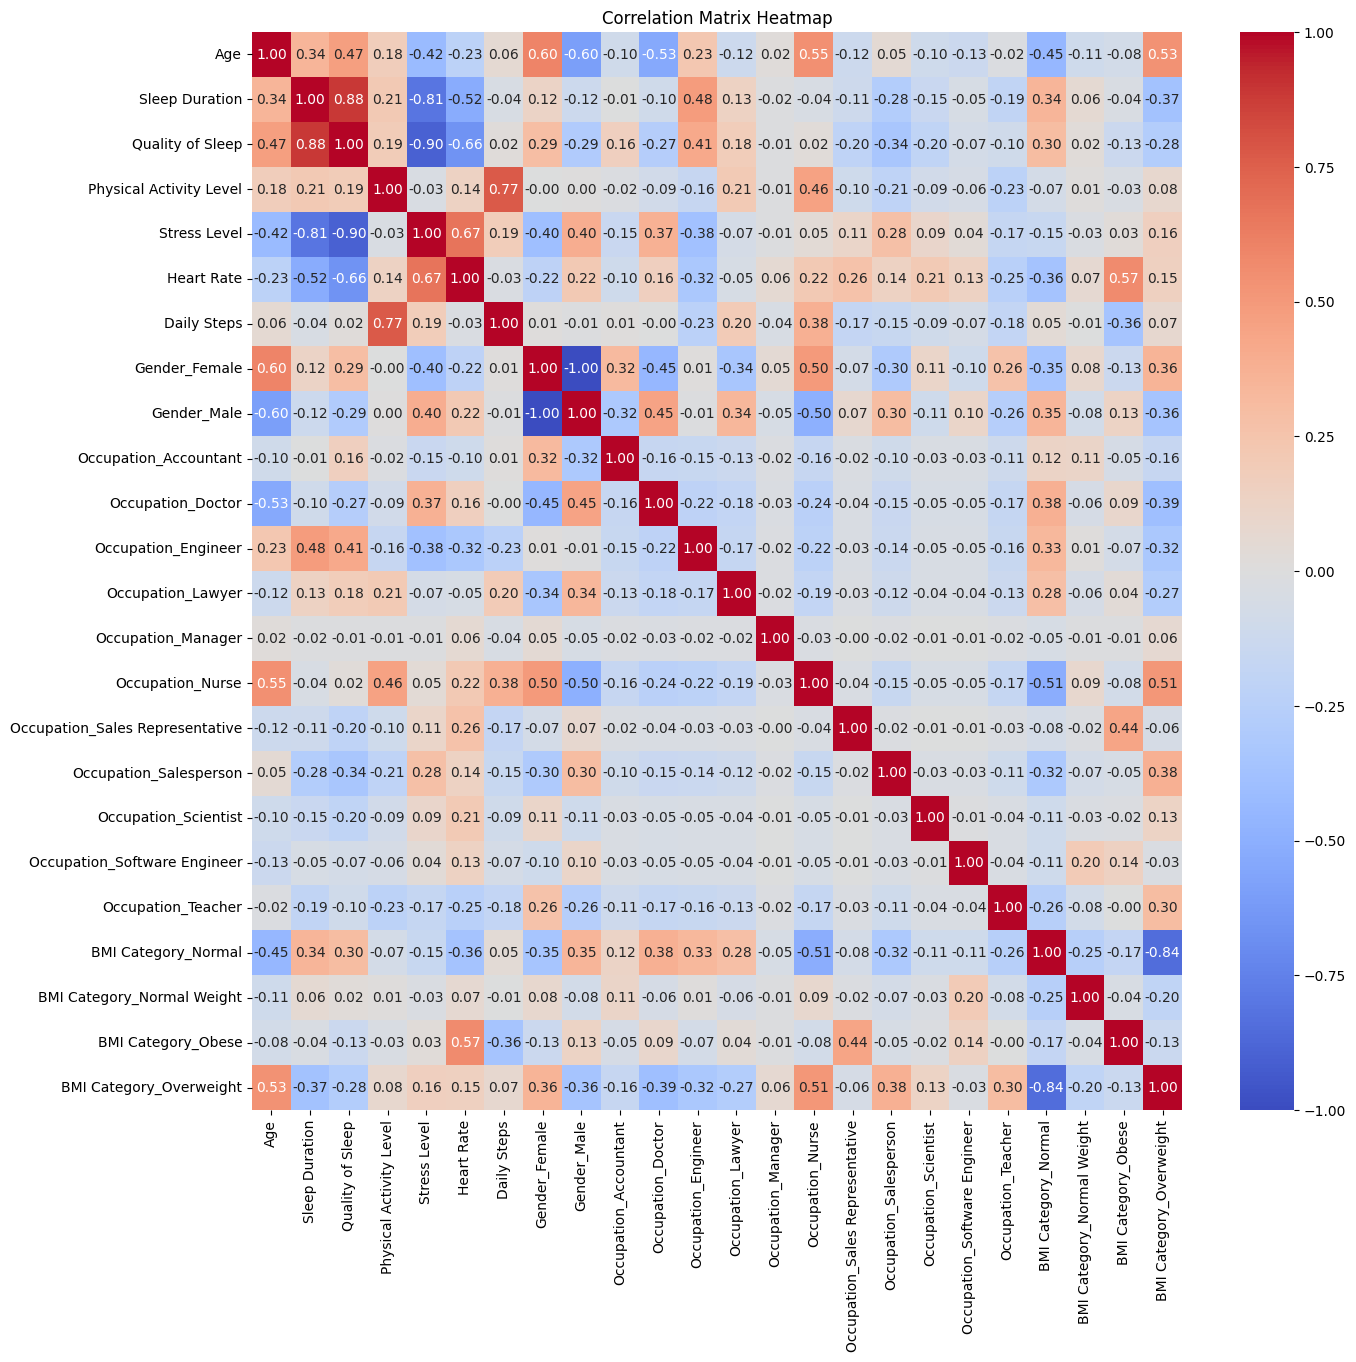

In [20]:
# Correlation matrix heatmap
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Data Split and Model Building

In [21]:
# !pip uninstall numpy
# !pip install numpy==1.21.0  # or any version <= 1.21


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [23]:
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [24]:
# Split the data into features (X) and the target variable (y)
X = data_encoded.drop(columns=['Stress Level'])
y = data_encoded['Stress Level']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Train a Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Make predictions
y_pred = rf_regressor.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

Mean Squared Error: 0.029306666666666672
RMSE: 0.17119190011991417


In [29]:
# Calculate the R2 score on the test set
r2_score = rf_regressor.score(X_test, y_test)
print("R2 score:", r2_score)

R2 score: 0.9906196654148174


In [46]:
import pickle
# Save the trained model to a file using pickle
with open('models/random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_regressor, model_file)

## Take input fro user and Test system

In [34]:
# Get user input
user_input = {}
for column in X_test.columns:
    print("Enter the value for {}:".format(column))
    user_input[column] = float(input())
    
    

Enter the value for Age:
Enter the value for Sleep Duration:
Enter the value for Quality of Sleep:
Enter the value for Physical Activity Level:
Enter the value for Heart Rate:
Enter the value for Daily Steps:
Enter the value for Gender_Female:
Enter the value for Gender_Male:
Enter the value for Occupation_Accountant:
Enter the value for Occupation_Doctor:
Enter the value for Occupation_Engineer:
Enter the value for Occupation_Lawyer:
Enter the value for Occupation_Manager:
Enter the value for Occupation_Nurse:
Enter the value for Occupation_Sales Representative:
Enter the value for Occupation_Salesperson:
Enter the value for Occupation_Scientist:
Enter the value for Occupation_Software Engineer:
Enter the value for Occupation_Teacher:
Enter the value for BMI Category_Normal:
Enter the value for BMI Category_Normal Weight:
Enter the value for BMI Category_Obese:
Enter the value for BMI Category_Overweight:


In [35]:
# Convert the user input to a DataFrame
user_input_df = pd.DataFrame(user_input, columns=X_test.columns, index=[0])
user_input_df

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Heart Rate,Daily Steps,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,29.0,6.0,6.0,30.0,70.0,8000.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
# Predict the stress level for the user input
predicted_stress_level = rf_regressor.predict(user_input_df)
print("Predicted stress level:", predicted_stress_level)

Predicted stress level: [8.]


## Adding Explainable AI

In [37]:
# Step 3: Use SHAP for model interpretation
explainer_shap = shap.Explainer(rf_regressor, X_train)
#shap_values = explainer_shap.shap_values(X_test)

In [45]:
#explainer_shap
# Get the SHAP values for the user input DataFrame
shap.initjs()

shap_values = explainer_shap.shap_values(user_input_df.values)

# Get the list of feature names
feature_names = X_train.columns.tolist()

# Create the SHAP force plot
shap.force_plot(explainer_shap.expected_value, shap_values[0, :], user_input_df.values, feature_names=feature_names)



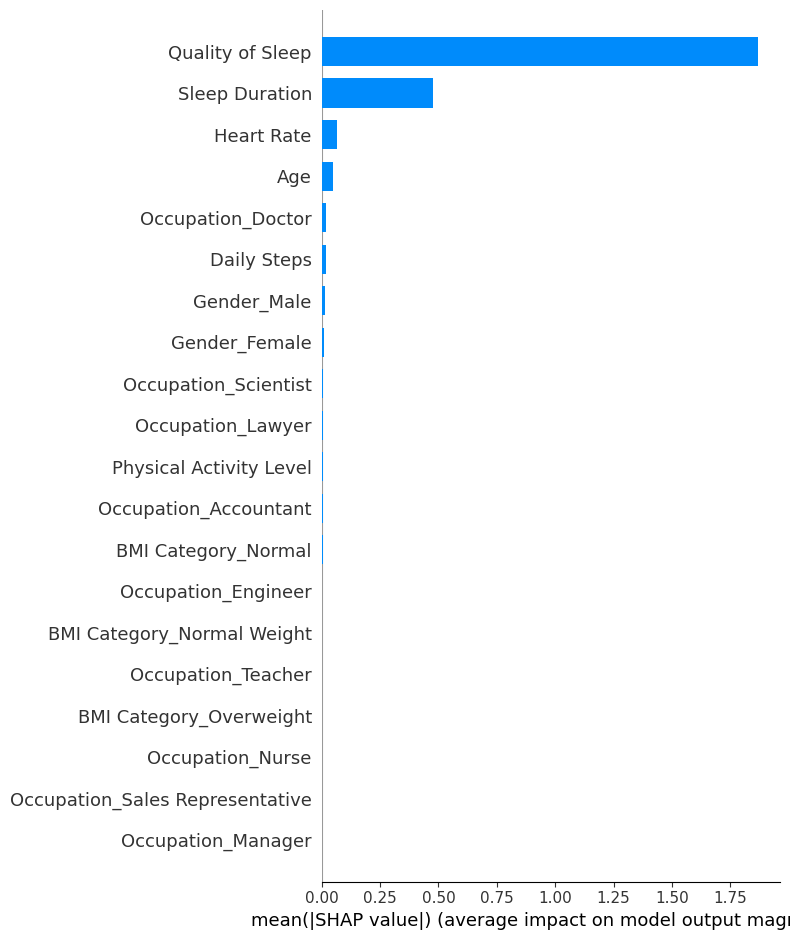

In [39]:
# Plot the SHAP summary plot to visualize feature importances
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [40]:
# # You can also create individual SHAP force plots to explain specific predictions
# shap.initjs()
# shap.force_plot(explainer_shap.expected_value, shap_values[0, :], user_input_df.values[0, :])


In [41]:
# # Get the list of feature names
# feature_names = X_train.columns.tolist()
# feature_names

In [42]:
# Create the LIME explainer
explainer_LIME = LimeTabularExplainer(X_train.values, mode="regression", training_labels=y_train, feature_names=feature_names)

In [43]:
# Generate LIME explanations for the Random Forest model
lime_explanation_rf = explainer_LIME.explain_instance(user_input_df.values[0], rf_regressor.predict)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [44]:
# Plot the LIME explanation
lime_explanation_rf.show_in_notebook()